In [1]:
"""
    Librerias segmentadas en grupos para el funcionamiento del modelo
    Grupo A: Control de los datos y archivos CSV conformado Pandas, StringIO
    Grupo B: Forman parte del modelo Decision Tree conformado Sklearn.
    Grupo C: Permiten generar graficas y exportar en imagenes conformado por MatplotLib, Seaborn.
"""
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import matplotlib.pyplot as plt
import seaborn as sn
import pydotplus
print(__doc__)


    Librerias segmentadas en grupos para el funcionamiento del modelo
    Grupo A: Control de los datos y archivos CSV conformado Pandas, StringIO
    Grupo B: Forman parte del modelo Decision Tree conformado Sklearn.
    Grupo C: Permiten generar graficas y exportar en imagenes conformado por MatplotLib, Seaborn.



In [2]:
"""
    Variable df: permite leer el archivo csv en la direccion local
    Función str.strip() permite eliminar los datos blacos que se encuentren en el mismo.
    Función sample() imprime un total de 12 datos aleatorios
"""
df = pd.read_csv("Dataset.csv")
df['CLASS']= df['CLASS'].str.strip()
print(__doc__)
df.sample(12)


    Variable df: permite leer el archivo csv en la direccion local
    Función str.strip() permite eliminar los datos blacos que se encuentren en el mismo.
    Función sample() imprime un total de 12 datos aleatorios



,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
579,766,34446,F,56,5.6,46,9.1,5.6,5.8,1.60,1.7,1.0,35.0,Y
493,262,47889,M,55,4.1,86,10.0,4.9,0.7,1.20,3.4,0.4,30.0,Y
731,340,34510,M,61,6.5,78,9.2,6.5,2.4,1.70,1.8,1.5,37.0,Y
448,234,23456,F,55,4.0,72,11.0,4.4,2.1,1.10,2.5,0.9,26.0,Y
86,147,45365,F,25,10.0,35,4.0,4.3,3.5,0.80,1.3,0.8,22.0,N
466,139,49040,M,53,2.0,55,7.7,4.4,3.3,0.90,2.1,1.5,27.0,Y
419,449,24121,M,55,3.2,56,8.0,4.0,2.6,1.20,1.7,1.7,30.0,Y
106,429,48036,M,31,3.4,55,5.7,4.9,1.6,1.00,3.2,0.7,24.0,P
284,306,5474,M,73,4.3,67,10.3,4.2,1.9,1.95,9.9,0.7,34.0,Y
899,63,45466,F,55,4.4,35,11.7,5.0,3.5,1.50,2.1,1.5,29.0,Y


In [3]:
"""
  d1 = Valores a cambiar del genero
  d2 = valores a transformar de la clase
  map() = realiza la busqueda dentro de los datos en la columna establecida para realizar el cambio
"""
d1 = {'F':0,'M':1,'f':0}
df['Gender'] = df['Gender'].map(d1)
d2 = {'N':0,'P':1,'Y':2,'n':0,'p':1,'y':2}
df['CLASS'] = df['CLASS'].map(d2)
print(__doc__)


  d1 = Valores a cambiar del genero
  d2 = valores a transformar de la clase
  map() = realiza la busqueda dentro de los datos en la columna establecida para realizar el cambio



In [4]:
"""
    head() = permite imprimir el Data Frame observando los datos cambiados
"""
print(__doc__)
df.head()


    head() = permite imprimir el Data Frame observando los datos cambiados



,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [5]:
"""
    isna() = realiza la busqueda dentro del Datafram de los valores nulos
    sum() = realiza la cuenta de esos valores nulos de cada columna y los agrupa
"""
print(__doc__)
df.isna().sum()


    isna() = realiza la busqueda dentro del Datafram de los valores nulos
    sum() = realiza la cuenta de esos valores nulos de cada columna y los agrupa



ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [6]:
"""
    features = Se toma las columnas que permiten especificar las caracteristicas de los datos
    labels = Corresponde la columna que permitira realizar la clasificación.
"""
feature_cols = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
X = df[feature_cols] # features
y = df['CLASS'] #labels
print(__doc__)


    features = Se toma las columnas que permiten especificar las caracteristicas de los datos
    labels = Corresponde la columna que permitira realizar la clasificación.



In [7]:
"""
    train_test_split() = permite separar de los datos de cada variable en el segmento de entrnamiento y test.
                         Se estima esta separación en un % del 70 - 30.
                         Donde 70 representa el entrenamient
                         El 30 representa el test.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(__doc__)


    train_test_split() = permite separar de los datos de cada variable en el segmento de entrnamiento y test.
                         Se estima esta separación en un % del 70 - 30.
                         Donde 70 representa el entrenamient
                         El 30 representa el test.



In [8]:
"""
    clf = se hace el llamado del metodo para obtener el modelo DecisionTreeClassifier()
    clf.fit = se hace el entrenamiento del modelo en base a las variables declaradas previamente
    y:pred = se recupera mediante el metodo predict() la predicción de las etiquetas con el modelo
    
"""
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(__doc__)


    clf = se hace el llamado del metodo para obtener el modelo DecisionTreeClassifier()
    clf.fit = se hace el entrenamiento del modelo en base a las variables declaradas previamente
    y:pred = se recupera mediante el metodo predict() la predicción de las etiquetas con el modelo
    



In [9]:
"""
    Metricas de predicción en base al modelo, donde se analiza las variables de test y de predicción.
    Para la precisión y el recall se considera asignar un average de tipo macro ya que se implementa para analizar
    modelos de multi clase
"""
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))
print(__doc__)

Accuracy: 0.9666666666666667
Precision: 0.9375661375661376
Recall: 0.9009589947089948

    Metricas de predicción en base al modelo, donde se analiza las variables de test y de predicción.
    Para la precisión y el recall se considera asignar un average de tipo macro ya que se implementa para analizar
    modelos de multi clase




    en base a los datos obtenidos se corresponde en realizar la grafica, por lo cual realiza una evaluación de los datos
    considerando las columnas de las clases para la predicción.
    Se implementan metodos de la libreria pydotplus para mostrar y generar la misma.



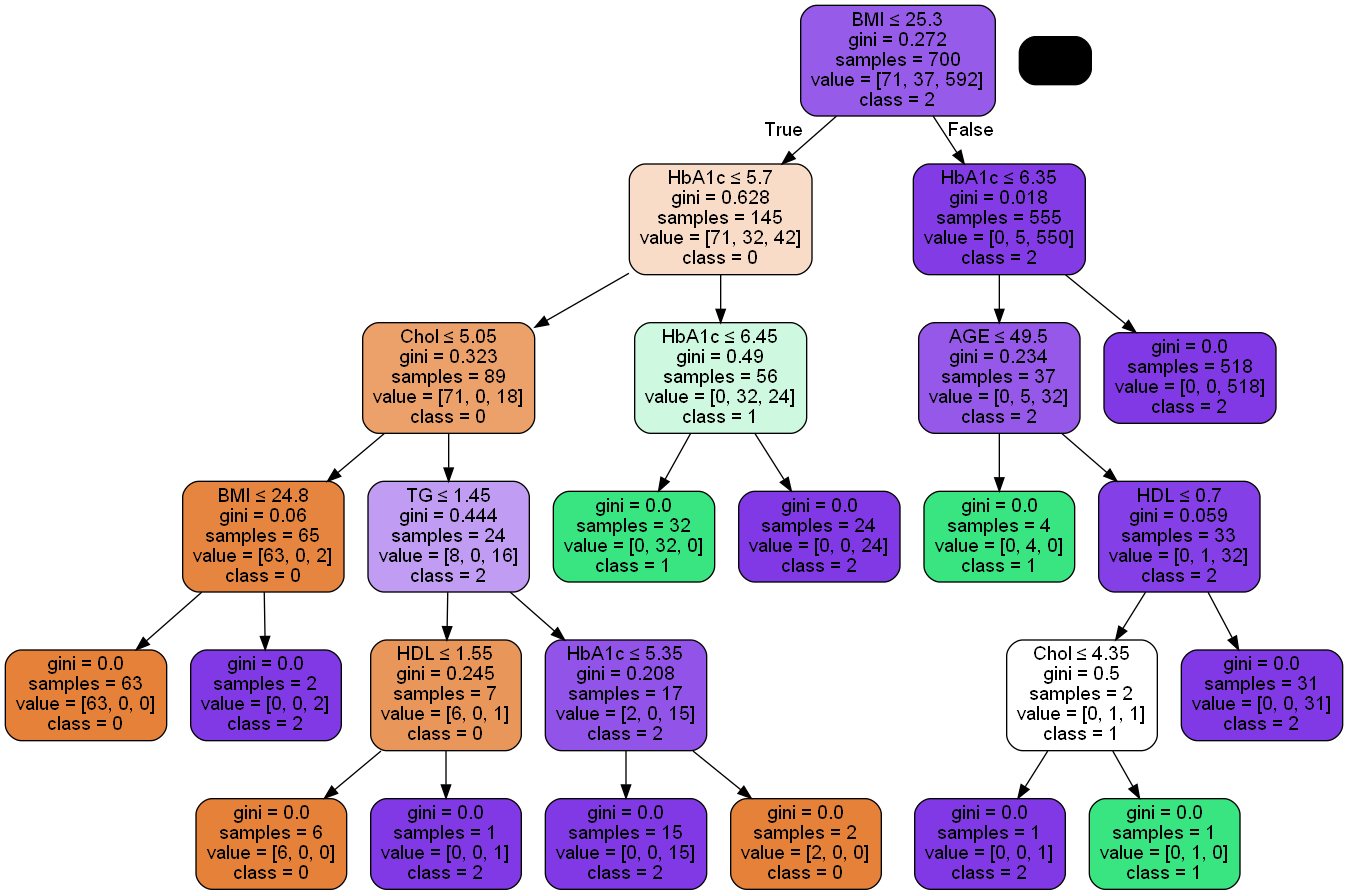

In [10]:
"""
    en base a los datos obtenidos se corresponde en realizar la grafica, por lo cual realiza una evaluación de los datos
    considerando las columnas de las clases para la predicción.
    Se implementan metodos de la libreria pydotplus para mostrar y generar la misma.
"""
print(__doc__)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [11]:
"""
    Metricas de predicción en base al modelo, donde se analiza las variables de test y de predicción.
    Para la precisión y el recall se considera asignar un average de tipo macro ya que se implementa para analizar
    modelos de multi clase.
    
    La implementación de los parametros para el metodo de clasificación se especifica la cantidad de niveles que debera
    considerar para el analisis.
"""
print(__doc__)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))


    Metricas de predicción en base al modelo, donde se analiza las variables de test y de predicción.
    Para la precisión y el recall se considera asignar un average de tipo macro ya que se implementa para analizar
    modelos de multi clase.
    
    La implementación de los parametros para el metodo de clasificación se especifica la cantidad de niveles que debera
    considerar para el analisis.

Accuracy: 0.9533333333333334
Precision: 0.9135686274509803
Recall: 0.9269179894179894



    en base a los datos obtenidos se corresponde en realizar la grafica, considerando que esta se encuentra
    acortada hasta un tercer nivel del mismo.



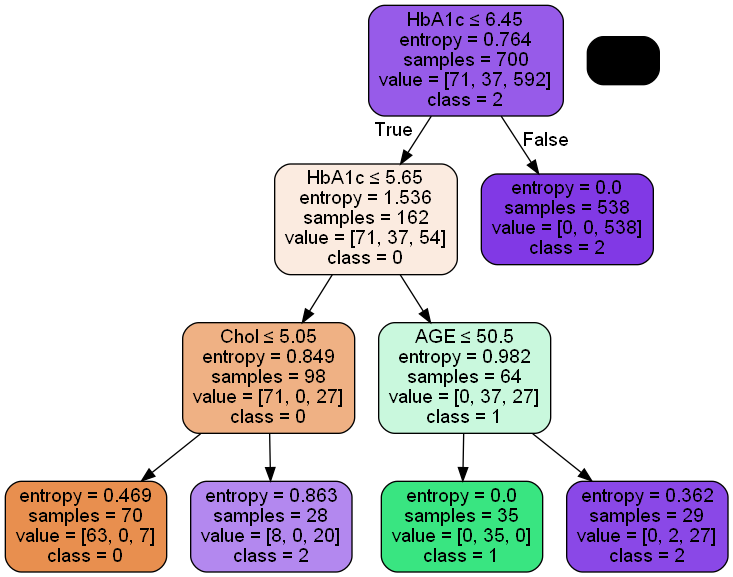

In [12]:
"""
    en base a los datos obtenidos se corresponde en realizar la grafica, considerando que esta se encuentra
    acortada hasta un tercer nivel del mismo.
"""
print(__doc__)
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())


    Se genera la matriz de confusión en base a las multiclases permitiendo clasificarlas a cada una de ellas
    de esta forma denotando la cantidad de elementos que ha predicho el modelo



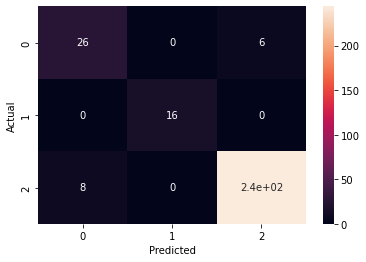

In [13]:
"""
    Se genera la matriz de confusión en base a las multiclases permitiendo clasificarlas a cada una de ellas
    de esta forma denotando la cantidad de elementos que ha predicho el modelo
"""
print(__doc__)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()